In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import compute_kl_divergence, plot_temperature_over_time

In [4]:
def quick_hist(df, column):
    plt.hist(df[column], bins=100)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# Load data/raw/train.csv
df = pd.read_csv('data/raw/train.csv')
df.head()

,ID,measurement_time,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
0,0,2023-11-01 00:00:00,3.400000,27.600000,18.799999,19.750000,21.100000,20.129892,0.0,0.0,0.0,0.0,0.0,8.97,2.06,140.0,20.0
1,1,2023-11-01 01:00:00,2.933333,28.400000,18.933333,19.833333,21.033333,20.052919,0.0,0.0,0.0,0.0,0.0,9.19,2.06,110.0,100.0
2,2,2023-11-01 02:00:00,7.166667,29.400000,19.000000,19.799999,21.000000,19.992375,0.0,0.0,0.0,0.0,0.0,9.42,2.57,140.0,20.0
3,3,2023-11-01 03:00:00,10.500000,30.100000,19.033333,19.933333,24.600000,19.941565,0.0,0.0,0.0,0.0,0.0,9.19,2.57,150.0,100.0
4,4,2023-11-01 04:00:00,8.733334,31.866666,19.100000,20.000000,24.700000,19.924502,0.0,0.0,0.0,0.0,0.0,9.99,2.57,160.0,100.0


3423
0.0 796.0


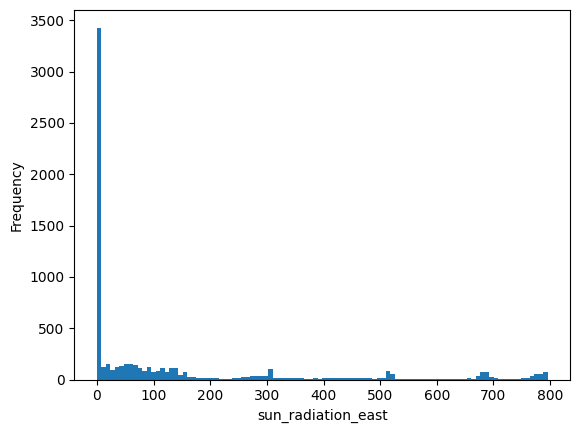

In [15]:
# Check unique values of sun_radiation_east
print(len(df['sun_radiation_east'].unique()))

# Print range
print(min(df['sun_radiation_east']), max(df['sun_radiation_east']))

quick_hist(df, 'sun_radiation_east')

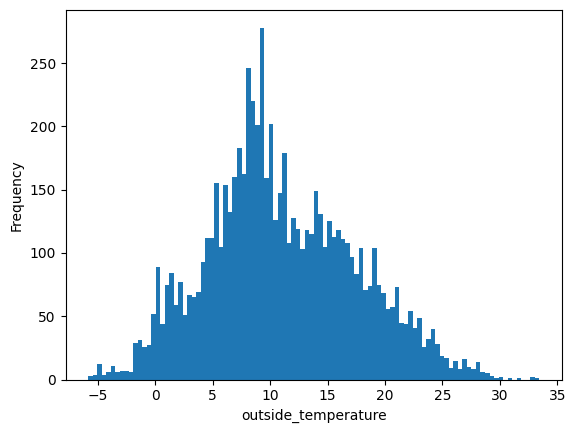

In [16]:
# Plot hist of outside_temperature
quick_hist(df, 'outside_temperature')

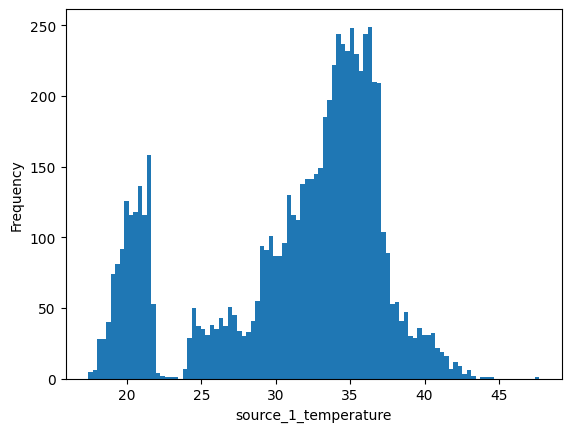

In [21]:
# hist of source_1_temperature
quick_hist(df, 'source_1_temperature')


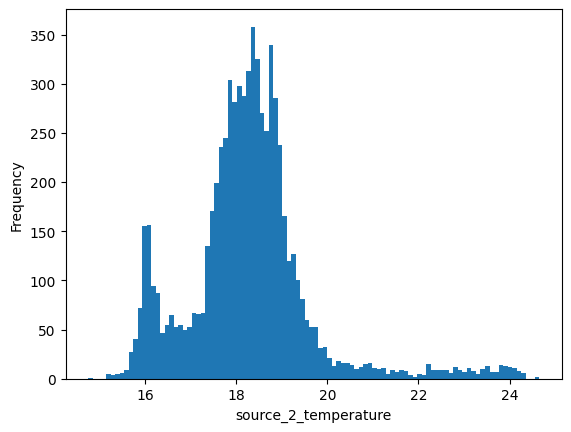

In [22]:
quick_hist(df, 'source_2_temperature')

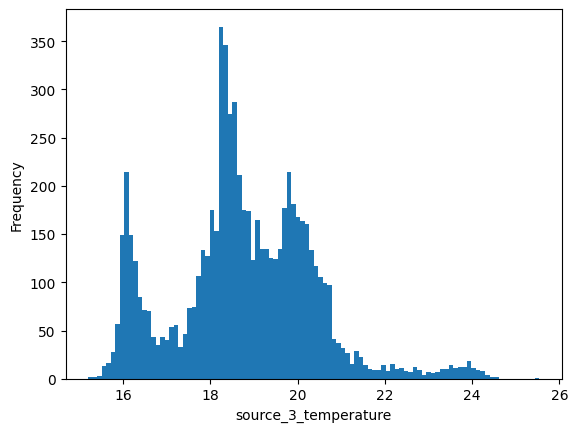

In [23]:
quick_hist(df, 'source_3_temperature')

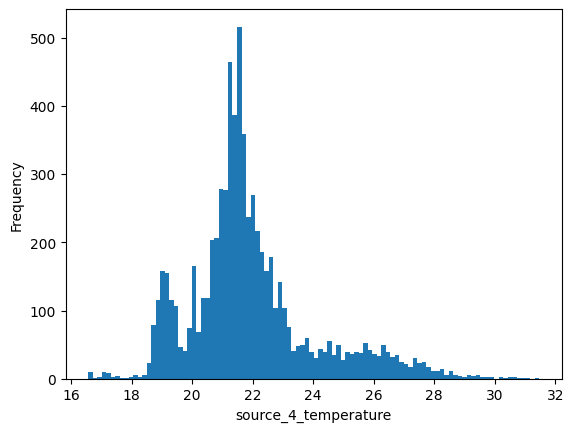

In [24]:
quick_hist(df, 'source_4_temperature')

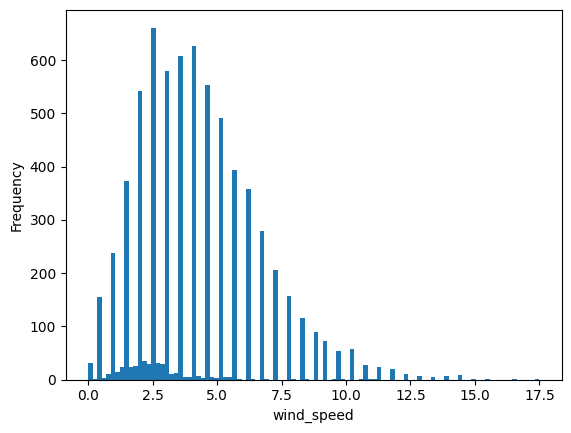

In [25]:
quick_hist(df, 'wind_speed')

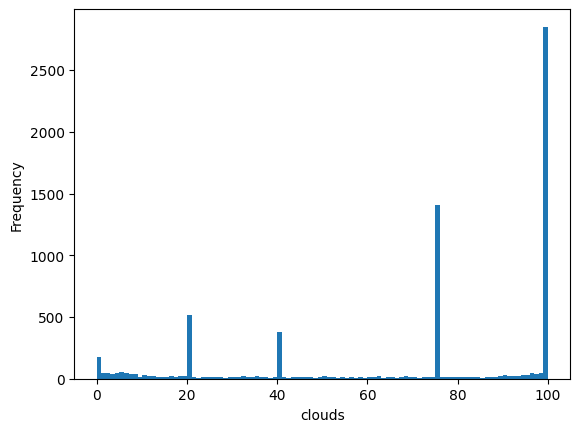

In [26]:
quick_hist(df, 'clouds')

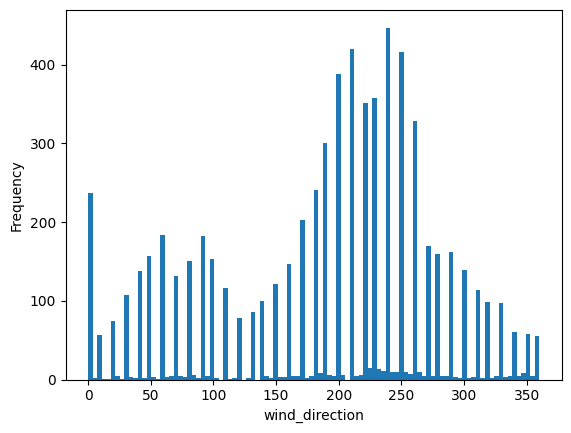

In [27]:
quick_hist(df, 'wind_direction')

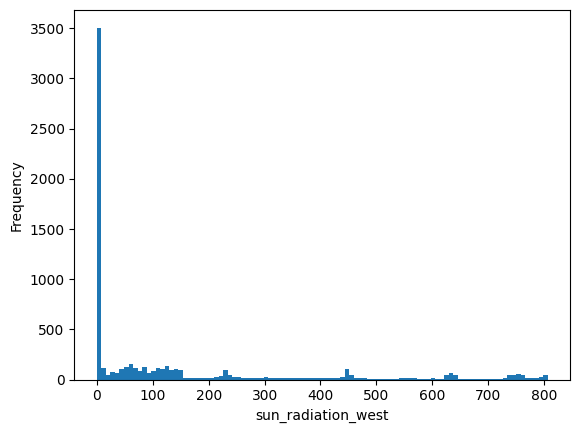

In [28]:
quick_hist(df, 'sun_radiation_west')

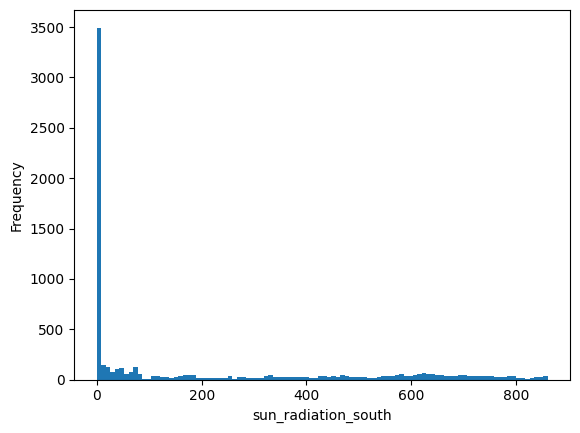

In [29]:
quick_hist(df, 'sun_radiation_south')

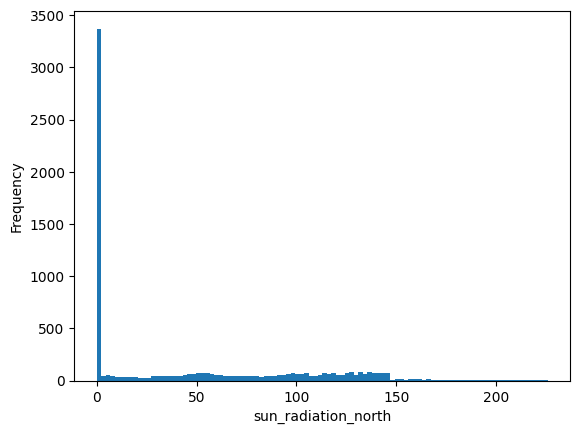

In [30]:
quick_hist(df, 'sun_radiation_north')

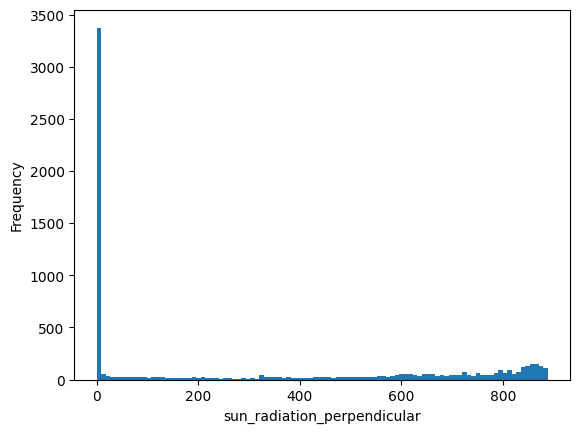

In [31]:
quick_hist(df, 'sun_radiation_perpendicular')

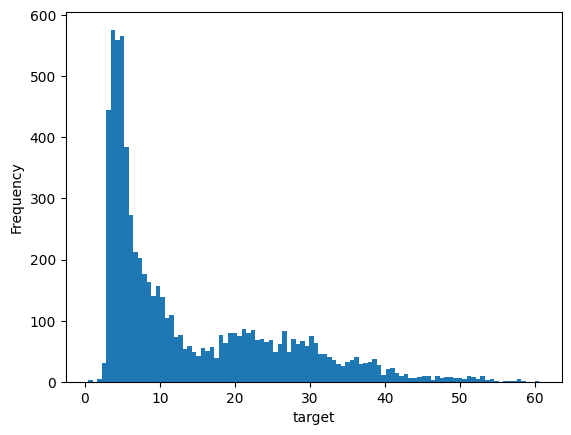

In [32]:
quick_hist(df, 'target')

In [5]:
# Check how many years of data we have
# measurement_time is in the format 'YYYY-MM-DD HH:MM:SS'

# Extract year from measurement_time
df['year'] = df['measurement_time'].apply(lambda x: int(x.split('-')[0]))

# Check unique years
print(df['year'].unique())

[2023 2024]


In [6]:
# Get year counts
year_counts = df['year'].value_counts()
print(year_counts)

year
2024    5583
2023    1464
Name: count, dtype: int64


In [35]:
# Check for null values
df.isnull().sum()

ID                             0
measurement_time               0
target                         0
source_1_temperature           0
source_2_temperature           0
source_3_temperature           0
source_4_temperature           0
mean_room_temperature          0
sun_radiation_east             0
sun_radiation_west             0
sun_radiation_south            0
sun_radiation_north            0
sun_radiation_perpendicular    0
outside_temperature            0
wind_speed                     0
wind_direction                 0
clouds                         3
year                           0
dtype: int64

In [8]:
df_test = pd.read_csv('data/raw/test.csv')
df_test.head()

,ID,measurement_time,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
0,7047,2024-08-20 15:00:00,40.349999,16.625000,16.325000,18.650000,21.171070,114.935484,622.645161,565.741935,115.774194,814.483871,23.43,6.17,200.0,20.0
1,7048,2024-08-20 16:00:00,39.500000,19.333333,17.966667,19.033333,21.464404,97.774194,735.258065,406.677419,99.612903,766.774194,19.10,5.66,210.0,40.0
2,7049,2024-08-20 17:00:00,37.600001,19.566667,18.775000,19.150001,21.561250,76.612903,749.064516,226.290323,81.967742,681.032258,19.23,2.06,230.0,20.0
3,7050,2024-08-20 18:00:00,37.299999,19.350000,19.350000,19.050000,21.498269,52.967742,616.451613,67.612903,70.387097,524.322581,18.83,3.60,220.0,20.0
4,7051,2024-08-20 19:00:00,33.025001,19.066667,19.750000,19.175001,21.417638,25.161290,301.096774,26.838710,88.903226,249.935484,18.12,2.57,220.0,20.0


In [37]:
# Check for null values
df_test.isnull().sum()

ID                              0
measurement_time                0
source_1_temperature            0
source_2_temperature            0
source_3_temperature            0
source_4_temperature            0
mean_room_temperature           0
sun_radiation_east              0
sun_radiation_west              0
sun_radiation_south             0
sun_radiation_north             0
sun_radiation_perpendicular     0
outside_temperature            13
wind_speed                     13
wind_direction                 13
clouds                         13
dtype: int64

In [39]:
# print number of columns
print(len(df.columns))
print(len(df_test.columns))

18
16


In [9]:
# Get unique values of year on test data
df_test['year'] = df_test['measurement_time'].apply(lambda x: int(x.split('-')[0]))
df_test['year'].unique()

array([2024])

In [15]:
# load data/no_simple_year/train.csv and print dtype of day_of_week
df = pd.read_pickle('data/no_simple_year/train.pkl')

# Make it categorical and do same for test data then save
test_df = pd.read_pickle('data/no_simple_year/test.pkl')
df['day_of_week'] = df['day_of_week'].astype('category')
test_df['day_of_week'] = test_df['day_of_week'].astype('category')

df.to_pickle('data/no_simple_year/train.pkl')
test_df.to_pickle('data/no_simple_year/test.pkl')

print(df['day_of_week'].dtype)

category


In [8]:
# load standard_scaler
scaled_df = pd.read_pickle('data/power_scaler/train.pkl')
scaled_df.head()

,ID,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,outside_temperature,year,holiday,work_hours,hour_sin,hour_cos
1464,1464,7.266667,1.109761,-0.215981,0.031675,0.215679,-2.471591,-0.720449,2024,0,0,-0.002777,1.414170
1465,1465,6.575000,1.338975,-0.299926,-0.027327,0.180053,-2.473385,-0.686324,2024,0,0,0.363487,1.366018
1466,1466,3.700000,1.409784,-0.428793,-0.007603,0.724455,-2.472651,-0.624433,2024,0,0,0.705045,1.224840
1467,1467,18.533333,0.619106,-0.472555,-0.027327,1.788791,-2.453600,-0.602817,2024,0,0,0.998512,1.000246
1468,1468,13.100000,0.743067,-0.428793,-0.007603,1.849607,-2.422024,-0.759303,2024,0,0,1.223787,0.707523


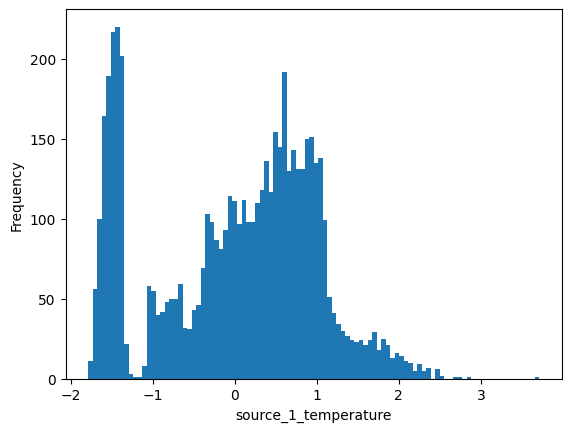

In [10]:
# hist source_1_temperature
quick_hist(scaled_df, 'source_1_temperature')

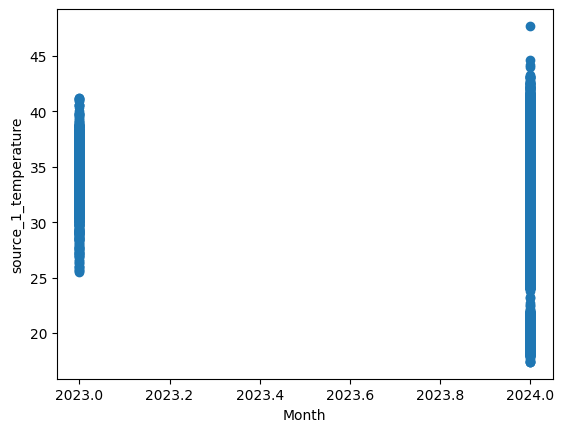

In [3]:
# load standard
standard_df = pd.read_pickle('data/standard/train.pkl')
test_standard_df = pd.read_pickle('data/standard/test.pkl')

# print type of all columns
print(standard_df.dtypes)

# Make work_hour categorical
standard_df['work_hours'] = standard_df['work_hours'].astype('category')
test_standard_df['work_hours'] = test_standard_df['work_hours'].astype('category')

# Save
standard_df.to_pickle('data/standard/train.pkl')
test_standard_df.to_pickle('data/standard/test.pkl')

ID                          int64
target                    float64
source_1_temperature      float64
source_2_temperature      float64
source_3_temperature      float64
source_4_temperature      float64
mean_room_temperature     float64
outside_temperature       float64
holiday                  category
work_hours               category
hour_sin                  float64
hour_cos                  float64
dtype: object


In [5]:
# Check null values
print(standard_df.isnull().sum())

print(test_standard_df.isnull().sum())

ID                       0
target                   0
source_1_temperature     0
source_2_temperature     0
source_3_temperature     0
source_4_temperature     0
mean_room_temperature    0
outside_temperature      0
holiday                  0
work_hours               0
hour_sin                 0
hour_cos                 0
dtype: int64
ID                        0
source_1_temperature      0
source_2_temperature      0
source_3_temperature      0
source_4_temperature      0
mean_room_temperature     0
outside_temperature      13
holiday                   0
work_hours                0
hour_sin                  0
hour_cos                  0
dtype: int64


In [9]:
# Set missing values to mean of column, only use on outside_temperature
standard_df['outside_temperature'] = standard_df['outside_temperature'].fillna(standard_df['outside_temperature'].mean())
test_standard_df['outside_temperature'] = test_standard_df['outside_temperature'].fillna(test_standard_df['outside_temperature'].mean())

In [10]:
# save
standard_df.to_pickle('data/standard/train.pkl')
test_standard_df.to_pickle('data/standard/test.pkl')

In [11]:
# explore smogn
smogn_df = pd.read_pickle('data/smogn/train.pkl')
smogn_df.head()

,ID,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,outside_temperature,holiday,work_hours,hour_sin,hour_cos
0,1710.0,31.496884,1.240389,2.066288,1.465389,3.269237,0.000000,0.0,0,0,1.374957,0.0
1,1711.0,28.009013,1.156586,0.898451,0.753635,2.283973,0.000000,0.0,0,NaN,1.094372,0.0
2,1911.0,32.095823,0.336785,0.000000,3.018166,0.214180,0.496208,0.0,0,1,0.000000,0.0
3,1911.0,32.095823,0.280412,0.000000,2.999149,0.226863,0.563609,0.0,0,1,0.000000,0.0
4,4042.0,28.335097,0.760591,0.000000,0.000000,0.000000,0.374172,0.0,0,NaN,0.398233,0.0


In [12]:
# Check null values
print(smogn_df.isnull().sum())

ID                         0
target                     0
source_1_temperature       0
source_2_temperature       0
source_3_temperature       0
source_4_temperature       0
mean_room_temperature      0
outside_temperature        0
holiday                    0
work_hours               699
hour_sin                   0
hour_cos                   0
dtype: int64


In [14]:
# Fill remaining null values of work_hours randomly with 33% to be 0 and 66% to be 1
smogn_df['work_hours'] = smogn_df['work_hours'].fillna(pd.Series(np.random.choice([0, 1], size=len(smogn_df), p=[0.34, 0.66])))
smogn_df['work_hours'] = smogn_df['work_hours'].astype('category')

print(smogn_df.isnull().sum())

ID                       0
target                   0
source_1_temperature     0
source_2_temperature     0
source_3_temperature     0
source_4_temperature     0
mean_room_temperature    0
outside_temperature      0
holiday                  0
work_hours               0
hour_sin                 0
hour_cos                 0
dtype: int64


In [15]:
# Save
smogn_df.to_pickle('data/smogn/train.pkl')

## Day 3

Time for API Data

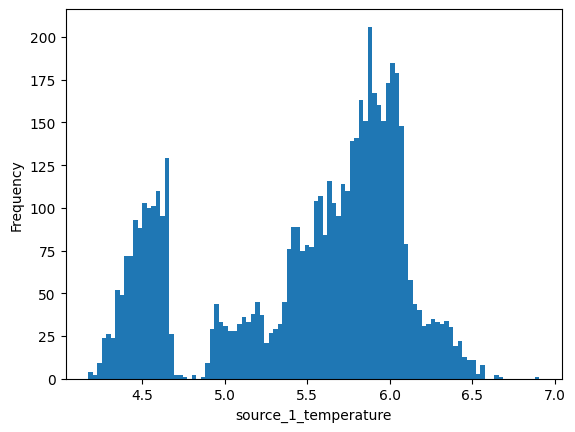

In [5]:
# Examine sqrt data
sqrt_df = pd.read_pickle('data/sqrt/train.pkl')

# hist of source_1_temperature
quick_hist(sqrt_df, 'source_1_temperature')

In [6]:
# Check correlation
sqrt_df.corr()

,ID,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,outside_temperature,holiday,work_hours,hour_sin,hour_cos
ID,1.000000,-0.145767,-0.741066,-0.016430,0.070689,-0.511638,0.653889,0.796648,0.015815,0.000965,-0.000334,-0.001246
target,-0.145767,1.000000,0.350644,-0.088340,-0.205387,0.213171,0.136455,0.008565,-0.434241,0.379690,0.164242,-0.530225
source_1_temperature,-0.741066,0.350644,1.000000,-0.062113,-0.123302,0.401925,-0.433759,-0.583271,-0.117272,0.027094,0.059473,-0.054814
source_2_temperature,-0.016430,-0.088340,-0.062113,1.000000,0.720130,0.276101,0.104952,-0.155067,0.144887,-0.207271,0.071842,0.169334
source_3_temperature,0.070689,-0.205387,-0.123302,0.720130,1.000000,0.137309,0.177739,-0.050962,0.238127,-0.272562,0.061682,0.266128
source_4_temperature,-0.511638,0.213171,0.401925,0.276101,0.137309,1.000000,-0.295441,-0.605897,-0.158657,-0.042701,0.258722,-0.044398
mean_room_temperature,0.653889,0.136455,-0.433759,0.104952,0.177739,-0.295441,1.000000,0.708806,-0.059283,0.289917,-0.263184,-0.263443
outside_temperature,0.796648,0.008565,-0.583271,-0.155067,-0.050962,-0.605897,0.708806,1.000000,0.010393,0.258826,-0.155216,-0.253110
holiday,0.015815,-0.434241,-0.117272,0.144887,0.238127,-0.158657,-0.059283,0.010393,1.000000,-0.000087,-0.001090,0.000292
work_hours,0.000965,0.379690,0.027094,-0.207271,-0.272562,-0.042701,0.289917,0.258826,-0.000087,1.000000,-0.223390,-0.832174


In [6]:
# Load minimal
minimal_df = pd.read_pickle('data/minimal/train.pkl')
minimal_test_df = pd.read_pickle('data/minimal/test.pkl')

# corr
minimal_df.corr()

,ID,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
ID,1.000000,-0.074520,-0.675099,-0.181337,-0.038893,-0.492640,0.607944,0.294695,0.314451,0.038223,0.489735,0.311252,0.745078,-0.292136,-0.056445,-0.216453
target,-0.074520,1.000000,0.306930,0.058481,-0.096792,0.259570,0.224478,0.323897,0.098030,0.397874,0.272801,0.378321,-0.011462,0.054814,-0.057421,-0.026352
source_1_temperature,-0.675099,0.306930,1.000000,0.024137,-0.081322,0.386306,-0.452966,-0.124907,-0.183399,0.013063,-0.278063,-0.149665,-0.585975,0.185214,0.006630,0.125230
source_2_temperature,-0.181337,0.058481,0.024137,1.000000,0.713757,0.363338,0.100837,-0.215567,-0.119319,-0.147262,-0.245807,-0.232819,-0.226541,-0.033741,-0.011175,0.069411
source_3_temperature,-0.038893,-0.096792,-0.081322,0.713757,1.000000,0.191386,0.167483,-0.254020,-0.134374,-0.239286,-0.261880,-0.293386,-0.081860,-0.060152,-0.009620,-0.025048
source_4_temperature,-0.492640,0.259570,0.386306,0.363338,0.191386,1.000000,-0.232168,-0.121017,-0.221798,-0.077216,-0.261505,-0.200011,-0.648796,-0.015999,-0.071218,0.101352
mean_room_temperature,0.607944,0.224478,-0.452966,0.100837,0.167483,-0.232168,1.000000,0.267597,0.426483,0.293536,0.516933,0.467436,0.638545,-0.242733,-0.140336,-0.254075
sun_radiation_east,0.294695,0.323897,-0.124907,-0.215567,-0.254020,-0.121017,0.267597,1.000000,0.061694,0.409561,0.598342,0.641843,0.333935,0.011554,-0.013777,-0.061904
sun_radiation_west,0.314451,0.098030,-0.183399,-0.119319,-0.134374,-0.221798,0.426483,0.061694,1.000000,0.393077,0.652111,0.639077,0.442166,0.073288,0.054426,-0.073527
sun_radiation_south,0.038223,0.397874,0.013063,-0.147262,-0.239286,-0.077216,0.293536,0.409561,0.393077,1.000000,0.585937,0.861518,0.240117,0.195040,0.055241,-0.006750


In [9]:
kl_divergence = compute_kl_divergence(minimal_df, minimal_test_df)

# Print in sorted order (is dict)
kl_divergence = dict(sorted(kl_divergence.items(), key=lambda x: x[1]))
display(kl_divergence)

{'sun_radiation_perpendicular': np.float64(0.029806677108610072),
 'clouds': np.float64(0.050969786134496334),
 'sun_radiation_west': np.float64(0.09567582103669413),
 'wind_direction': np.float64(0.09629108633919074),
 'sun_radiation_east': np.float64(0.10108162392313975),
 'sun_radiation_north': np.float64(0.14806080532930713),
 'outside_temperature': np.float64(0.22946322173770956),
 'sun_radiation_south': np.float64(0.4867690384366893),
 'mean_room_temperature': np.float64(0.48812095942168504),
 'source_1_temperature': np.float64(0.502405931196092),
 'source_2_temperature': np.float64(0.7985113420996564),
 'source_3_temperature': np.float64(1.1684858547704464),
 'source_4_temperature': np.float64(1.3802748467602515),
 'wind_speed': np.float64(1.8327712583383455)}

In [ ]:
# open retry
retry_df = pd.read_pickle('data/retry_data/train.pkl')

# Check null values
print(retry_df.isnull().sum())

ID                             0
target                         0
source_1_temperature           0
source_2_temperature           0
source_3_temperature           0
source_4_temperature           0
mean_room_temperature          0
outside_temperature            0
holiday                        0
work_hours                     0
hour_sin                       0
hour_cos                       0
clouds                         3
sun_radiation_west             0
sun_radiation_north            0
sun_radiation_perpendicular    0
sun_radiation_east             0
dtype: int64


In [11]:
# Fill null clouds with mean
retry_df['clouds'] = retry_df['clouds'].fillna(retry_df['clouds'].mean())

# Save
retry_df.to_pickle('data/retry_data/train.pkl')

In [14]:
# open retry test
retry_test_df = pd.read_pickle('data/retry_data/test.pkl')

# Check null values
print(retry_test_df.isnull().sum())

ID                             0
source_1_temperature           0
source_2_temperature           0
source_3_temperature           0
source_4_temperature           0
mean_room_temperature          0
outside_temperature            0
holiday                        0
work_hours                     0
hour_sin                       0
hour_cos                       0
clouds                         0
sun_radiation_west             0
sun_radiation_north            0
sun_radiation_perpendicular    0
sun_radiation_east             0
dtype: int64


In [13]:
# Fill null clouds with mean (use mean of test since its distribution is different)
retry_test_df['clouds'] = retry_test_df['clouds'].fillna(retry_test_df['clouds'].mean())

# Save
retry_test_df.to_pickle('data/retry_data/test.pkl')

In [ ]:
# Open basic time
basic_time_df = pd.read_pickle('data/basic_time/train.pkl')

# Plot how source_1_temperature changes over time
# We have month, day and hour columns



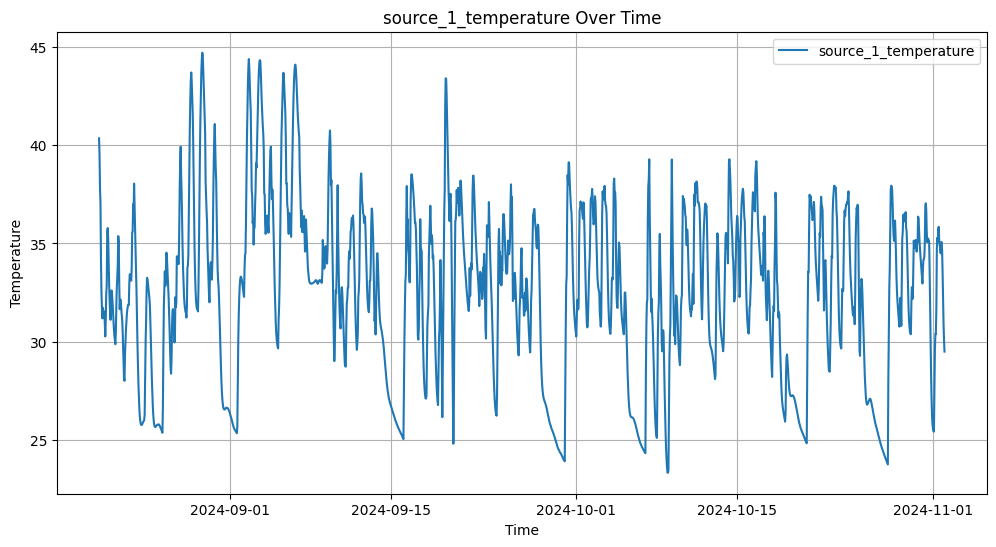

In [ ]:


# Open basic time DataFrame
basic_time_df = pd.read_pickle('data/kalman/test.pkl')

# Plot how source_1_temperature changes over time
plot_temperature_over_time(basic_time_df)

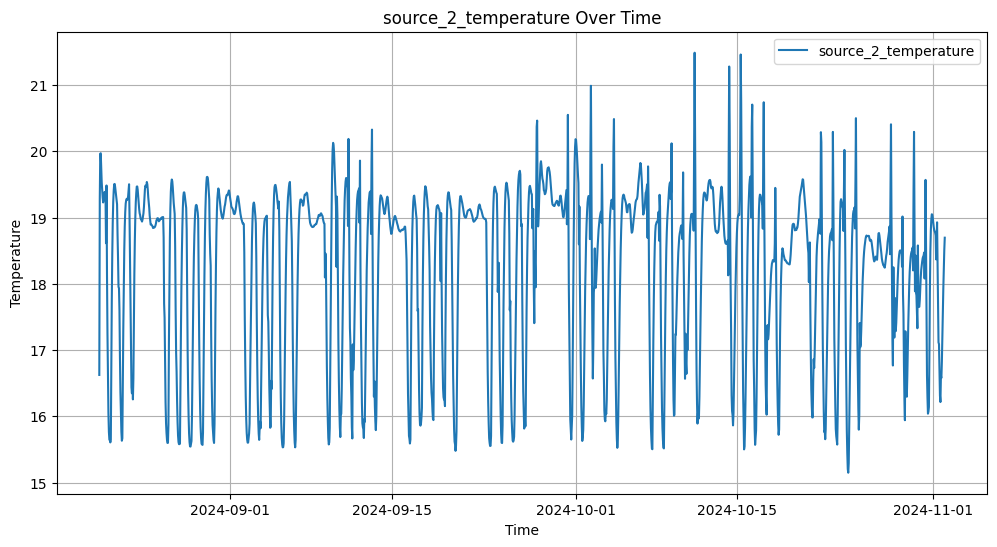

In [38]:
plot_temperature_over_time(basic_time_df, 'source_2_temperature')

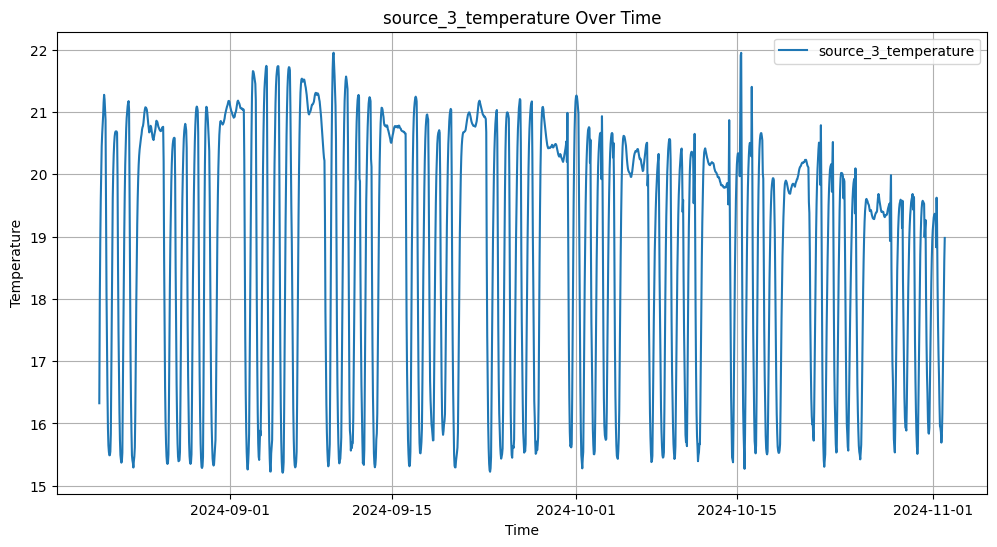

In [39]:
plot_temperature_over_time(basic_time_df, 'source_3_temperature')

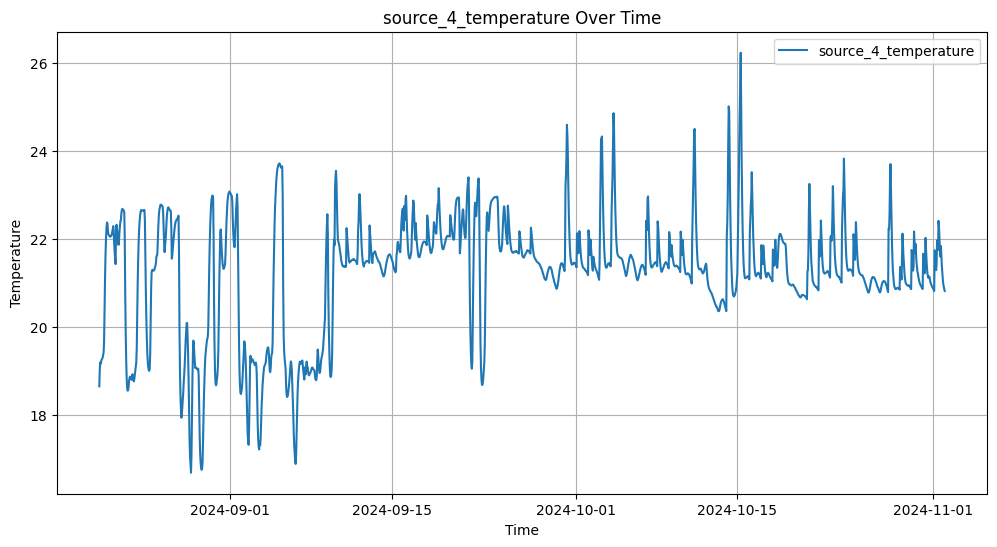

In [40]:
plot_temperature_over_time(basic_time_df, 'source_4_temperature')

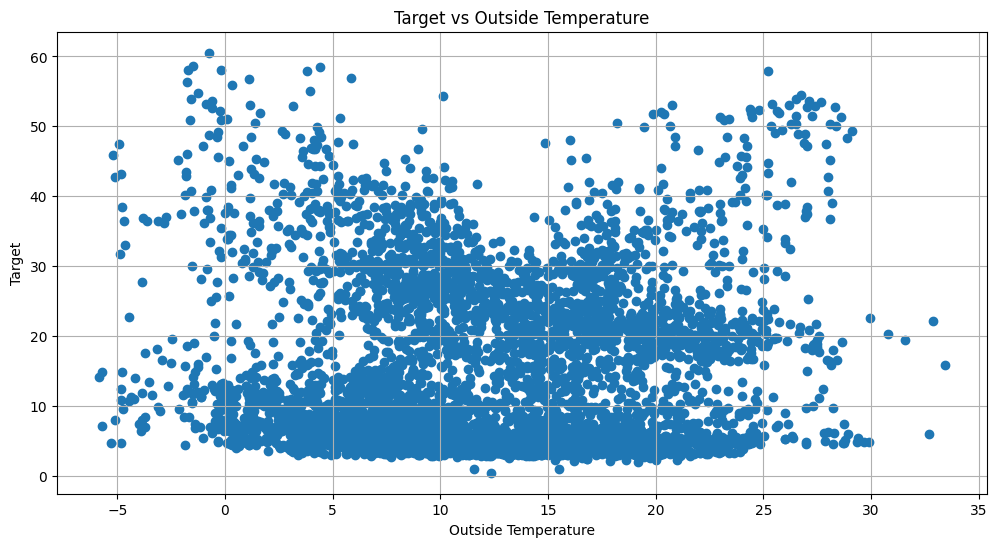

In [9]:
# load standard
standard_df = pd.read_pickle('data/standard/train.pkl')

# plot target against outside_temperature
plt.figure(figsize=(12, 6))
plt.scatter(standard_df['outside_temperature'], standard_df['target'])
plt.xlabel('Outside Temperature')
plt.ylabel('Target')
plt.title('Target vs Outside Temperature')
plt.grid(True)
plt.show()

## Starting from the top

In [9]:
# open raw
raw_df = pd.read_csv('data/raw/train.csv')
raw_test_df = pd.read_csv('data/raw/test.csv')

pure_df = pd.read_pickle('data/pure/train.pkl')
pure_test_df = pd.read_pickle('data/pure/test.pkl')

# Add measurement_time to pure_df
pure_df['measurement_time'] = raw_df['measurement_time']
pure_test_df['measurement_time'] = raw_test_df['measurement_time']

In [36]:
print(len(pure_df))

7047


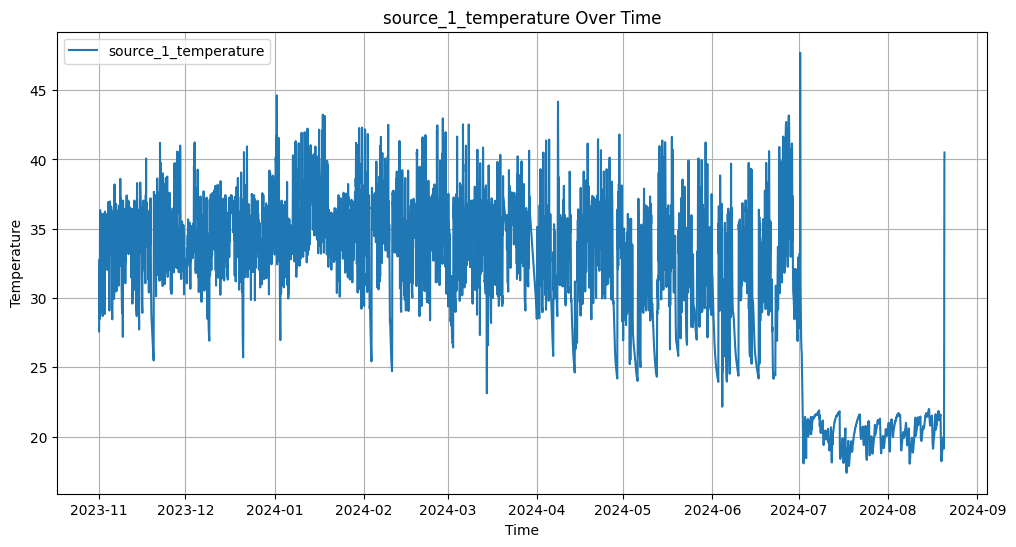

In [15]:
# convert measurement_time to datetime and then plot the source_x_temperature over time
pure_df['measurement_time'] = pd.to_datetime(pure_df['measurement_time'])

# Plot how source_1_temperature changes over time
plot_temperature_over_time(pure_df, 'source_1_temperature')

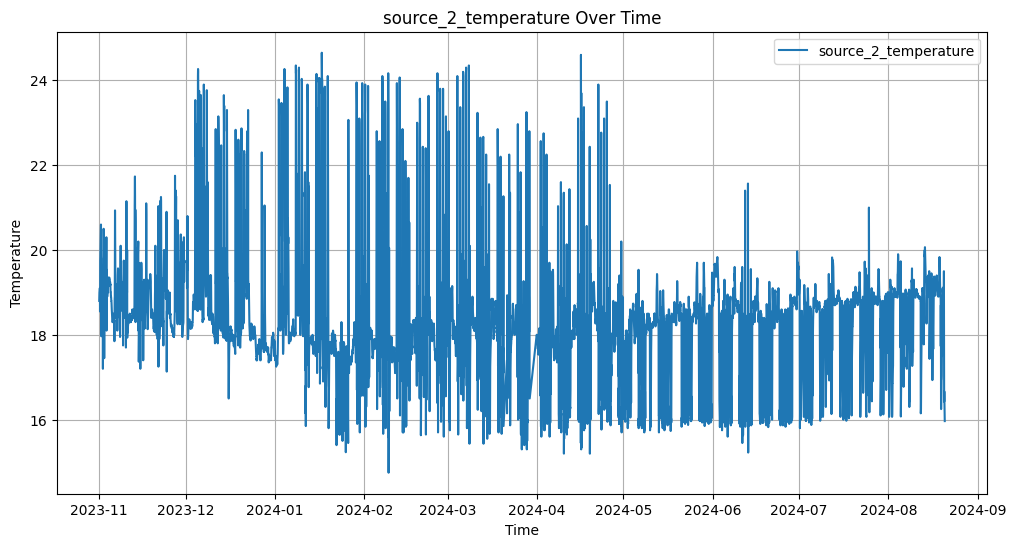

In [17]:
plot_temperature_over_time(pure_df, 'source_2_temperature')

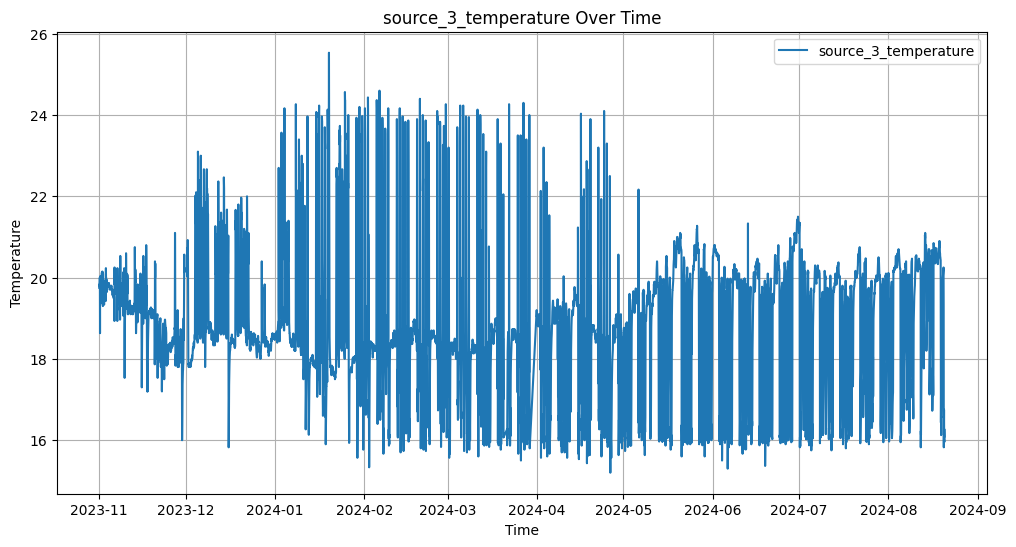

In [16]:
plot_temperature_over_time(pure_df, 'source_3_temperature')

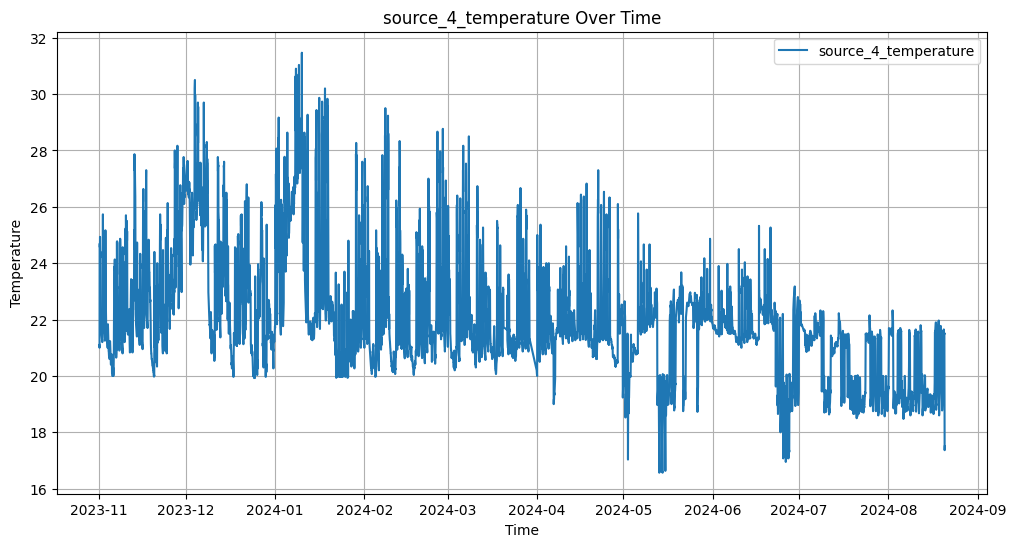

In [18]:
plot_temperature_over_time(pure_df, 'source_4_temperature')

In [22]:
# Check if there are periods of time where the temperature is constant
# Check source_1_temperature
source_1_temperature = pure_df['source_1_temperature']
source_1_temperature_diff = source_1_temperature.diff()
source_1_temperature_diff.value_counts()

source_1_temperature
 0.000000    150
-0.125000     60
 0.025000     57
 0.075000     44
 0.050000     40
            ... 
-0.375000      1
 2.241666      1
 0.533333      1
 0.150000      1
 0.074999      1
Name: count, Length: 4521, dtype: int64

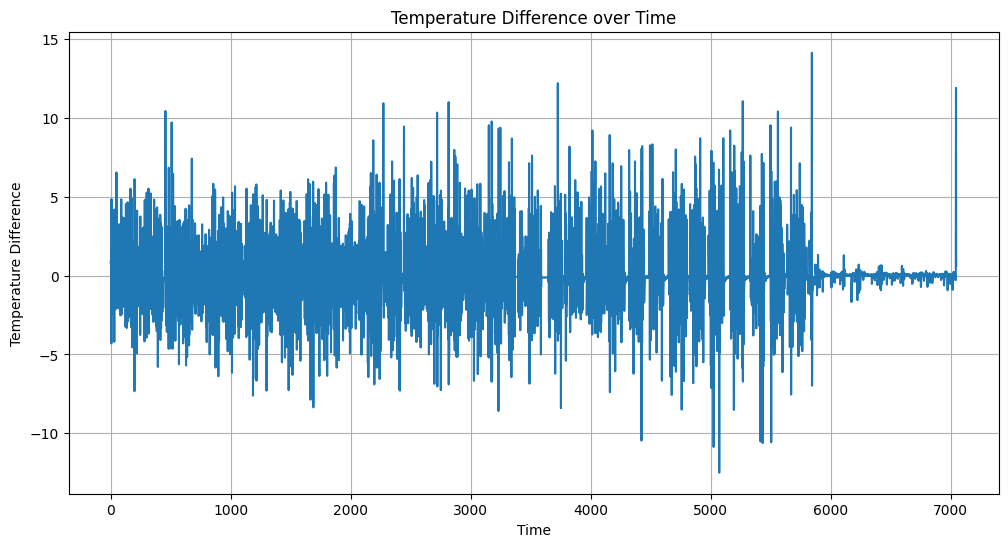

In [23]:
# Plot source_1_temperature_diff
plt.figure(figsize=(12, 6))
plt.plot(source_1_temperature_diff)
plt.xlabel('Time')
plt.ylabel('Temperature Difference')
plt.title('Temperature Difference over Time')
plt.grid(True)
plt.show()

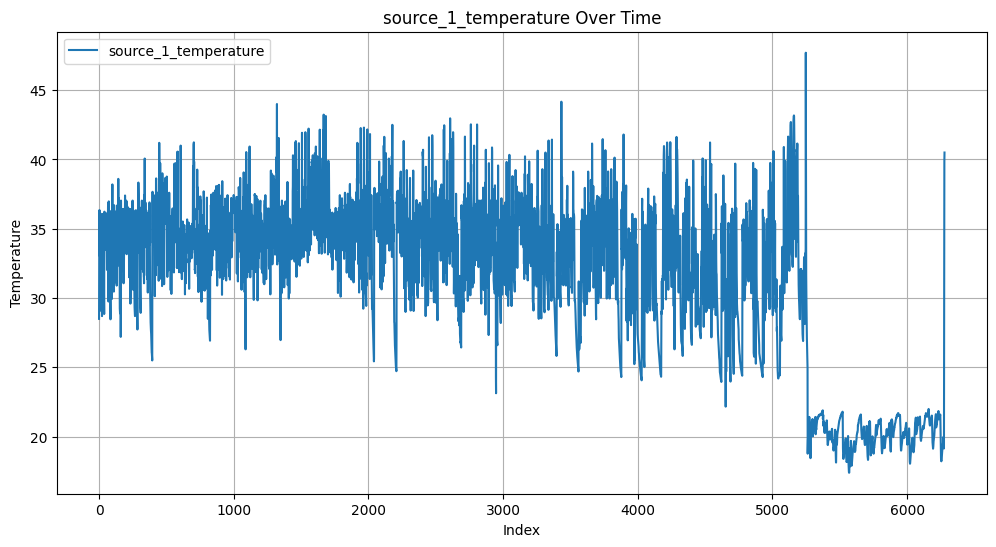

6279


In [35]:
# load from slope_removed
slope_removed_df = pd.read_pickle('data/slope_removed/train.pkl')

# Plot how source_1_temperature changes over time
plot_temperature_over_time(slope_removed_df, 'source_1_temperature')

print(len(slope_removed_df))

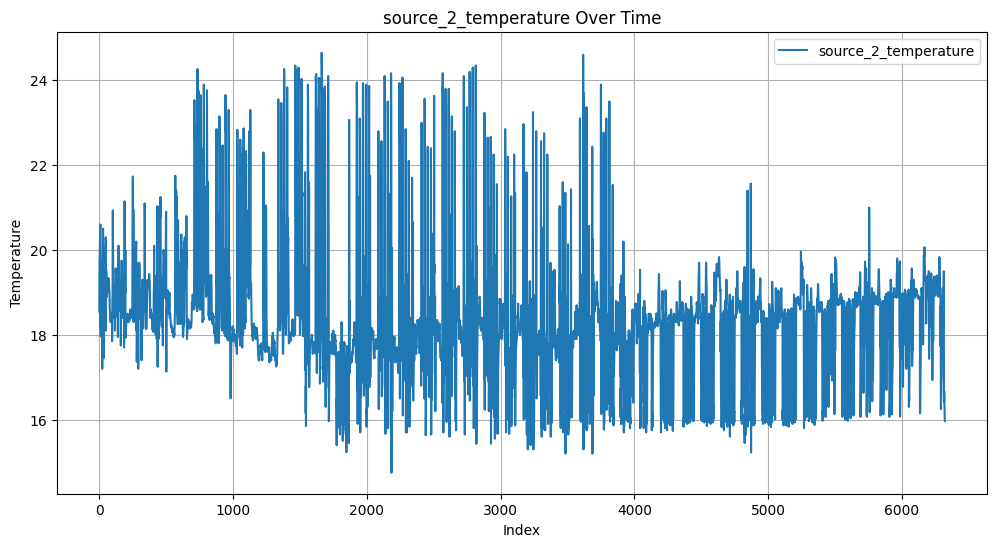

In [34]:
plot_temperature_over_time(slope_removed_df, 'source_2_temperature')